# 11: Differential Effective Medium (DEM)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
plt.rcParams['font.family']='arial'

<div class="alert alert-block alert-success">
<b>Learning Objectives:</b>
<ul>
    <li>Berrymann's differential effective medium</li>
</ul>
</div>

## Berrymann's Differential effective medium (DEM) model

The DEM theory models two-phase composites by incrementally adding inclusions of one phase (phase 2) to the matrix phase. The matrix begins as phase 1 (when the concentration of phase 2 is zero) and is changed at each step as a new increment of phase 2 material is added. The process is continued until the desired proportion of the constituents is reached. The process of incrementally adding inclusions to the matrix is really a thought experiment and should not be taken to provide an accurate description of the true evolution of rock porosity in nature.

The coupled system of ordinary differential equations for the effective bulk and
shear moduli, $K^{DEM}_{eff}$ and $\mu^{DEM}_{eff}$, respectively, are (Berryman, 1992b)

$
(1-y) \frac{d}{d y}\left[K_{D E M}^{e f f}(y)\right]=\left(K_{2}-K_{D E M}^{e f f}\right) P^{e f f 2}(y)
$

$
(1-y) \frac{d}{d y}\left[\mu_{D E M}^{e f f}(y)\right]=\left(\mu_{2}-\mu_{D E M}^{e f f}\right) Q^{e f f 2}(y)
$

with initial conditions  $K^{DEM}_{eff} (0)=K_1$ and $\mu^{DEM}_{eff}(0)=\mu_1$, where K1 and μ1 are the bulk and shear moduli of the initial host material (phase 1), K2 and μ2 are the bulk and shear moduli of the incrementally added inclusions (phase 2), and y is the concentration of phase 2.
For fluid inclusions and voids, y equals the porosity, ϕ. **Fluid Effect**: 
Dry cavities can be modeled by setting the inclusion moduli to zero. Fluid-saturated cavities are simulated by setting the inclusion shear modulus to zero. Expressions for the
volumetric and deviatoric strain concentration factors, Peff 2 and Qeff 2:

$P^{m n}=\frac{1}{3}T_{i i j j}^{m n}$

$Q^{m n}=\frac{1}{5}(T_{i j i j}^{m n}-T_{i i j j}^{m n})$

$T_{i i j j}^{m n}=\frac{3 F_{1}}{F_{2}}$

$T_{i j i j}^{m n}-\frac{1}{3} T_{i i j j}^{m n}=\frac{2}{F_{3}}+\frac{1}{F_{4}}+\frac{F_{4} F_{5}+F_{6} F_{7}-F_{8} F_{9}}{F_{2} F_{4}}$

where

$F_{1}=1+A\left[\frac{3}{2}(f+\theta)-R\left(\frac{3}{2} f+\frac{5}{2} \theta-\frac{4}{3}\right)\right]$

$F_{2}=1+A\left[1+\frac{3}{2}(f+\theta)-\frac{1}{2} R(3 f+5 \theta)\right]+B(3-4 R)+\frac{1}{2} A(A+3 B)(3-4 R)\left[f+\theta-R\left(f-\theta+2 \theta^{2}\right)\right] $ \\


$F_{3}=1+A\left[1-\left(f+\frac{3}{2} \theta\right)+R(f+\theta)\right]$

$F_{4}=1+\frac{1}{4} A[f+3 \theta-R(f-\theta)]$ 

$F_{5}=A\left[-f+R\left(f+\theta-\frac{4}{3}\right)\right]+B \theta(3-4 R)$ 

$F_{6}=1+A[1+f-R(f+\theta)]+B(1-\theta)(3-4 R)$ 

$F_{7}=2+\frac{1}{4} A[3 f+9 \theta-R(3 f+5 \theta)]+B \theta(3-4 R)$ 

$F_{8}=A\left[1-2 R+\frac{1}{2} f(R-1)+\frac{1}{2} \theta(5 R-3)\right]+B(1-\theta)(3-4 R)$ 

$F_{9}=A[(R-1) f-R \theta]+B \theta(3-4 R)$

with $A, B$, and $R$ given by

$A=\mu_{\mathrm{i}} / \mu_{\mathrm{m}}-1$

$B=\frac{1}{3}\left(\frac{K_{\mathrm{i}}}{K_{\mathrm{m}}}-\frac{\mu_{\mathrm{i}}}{\mu_{\mathrm{m}}}\right)$

$R=\frac{\left(1-2 v_{\mathrm{m}}\right)}{2\left(1-v_{\mathrm{m}}\right)}$

The functions $\theta$ and $f$ are given by 

$
\theta=\begin{cases}
\{\frac{\alpha}{\left(\alpha^{2}-1\right)^{3 / 2}}\left[\alpha\left(\alpha^{2}-1\right)^{1 / 2}-\cosh ^{-1} \alpha\right]
 \\
\frac{\alpha}{\left(1-\alpha^{2}\right)^{3 / 2}}\left[\cos ^{-1} \alpha-\alpha\left(1-\alpha^{2}\right)^{1 / 2}\right]
\end{cases}
$
for prolate and oblate spheroids, respectively, and

$
f=\frac{\alpha^{2}}{1-\alpha^{2}}(3 \theta-2)
$

Note that $\alpha$ <1 for oblate spheroids and $\alpha>1 $ for prolate spheroids

For spherical pores:

$
P=\frac{K_{\mathrm{m}}+\frac{4}{3} \mu_{\mathrm{m}}}{K_{\mathrm{i}}+\frac{4}{3} \mu_{\mathrm{m}}} 
$

$
Q=\frac{\mu_{\mathrm{m}}+\zeta_{\mathrm{m}}}{\mu_{\mathrm{i}}+\zeta_{\mathrm{m}}}
$

In [8]:
from scipy.integrate import odeint

def PQ(Km,Gm, Ki,Gi, alpha):    
    """ compute geometric strain concentration factors P and Q for prolate and oblate spheroids according to Berymann (1980). Written by Jiaxin Yu (July 2021)
    

    Args:
        Km (GPa): Bulk modulus of matrix phase
        Gm (GPa): Shear modulus of matrix phase
        Ki (GPa): Bulk modulus of matrix phase
        Gi (GPa): Shear modulus of matrix phase
        alpha (float): aspect ratio. Note that α <1 for oblate spheroids and α > 1 for prolate spheroids

    Returns:
        P,Q (unitless): geometric strain concentration factors
    """

    if alpha==1:
        P= (Km+4*Gm/3)/(Ki+4*Gm/3)
        kesai= Gm/6 *(9*Km+8*Gm)/(Km+2*Gm)
        Q= (Gm+kesai)/(Gi+kesai)
        
    
    else:

        if alpha<1:
            theta= alpha/(1.0 - alpha**2)**(3.0/2.0) * (np.arccos(alpha) - alpha*np.sqrt(1.0 - alpha**2))
        else:
            theta= alpha/(alpha**2-1)**(3.0/2.0) * ( alpha*(alpha**2-1)**0.5 -np.cosh(alpha)**-1)
        f= alpha**2*(3.0*theta - 2.0)/(1.0 - alpha**2)
        A = Gi/Gm - 1.0
        B = (Ki/Km - Gi/Gm)/3.0
        R = Gm/(Km + (4.0/3.0)*Gm) # 
        F1 = 1.0 + A*(1.5*(f + theta) - R*(1.5*f + 2.5*theta - 4.0/3.0))
        F2 = 1.0 + A*(1.0 + 1.5*(f + theta) - R*(1.5*f + 2.5*theta)) + B*(3.0 - 4.0*R) + A*(A + 3.0*B)*(1.5 - 2.0*R)*(f + theta - R*(f - theta + 
        2.0*theta**2))
        F3 = 1.0 + A*(1.0 - f - 1.5*theta + R*(f + theta))
        F4 = 1.0 + (A/4.0)*(f + 3.0*theta - R*(f - theta))
        F5 = A*(-f + R*(f + theta - 4.0/3.0)) + B*theta*(3.0 - 4.0*R)
        F6 = 1.0 + A*(1.0 + f - R*(f + theta)) + B*(1.0 - theta)*(3.0 - 4.0*R)
        F7 = 2.0 + (A/4.0)*(3.0*f + 9.0*theta - R*(3.0*f + 5.0*theta)) + B*theta*(3.0 - 4.0*R)
        F8 = A*(1.0 - 2.0*R + (f/2.0)*(R - 1.0) + (theta/2.0)*(5.0*R - 3.0)) + B*(1.0 - theta)*(3.0 - 4.0*R)
        F9 = A*((R - 1.0)*f - R*theta) + B*theta*(3.0 - 4.0*R)
        Tiijj = 3*F1/F2
        Tijij = Tiijj/3 + 2/F3 + 1/F4 + (F4*F5 + F6*F7 - F8*F9)/(F2*F4)
        P = Tiijj/3
        Q = (Tijij - P)/5
    return P, Q
def DEM(y,t, params):
    '''
    ODE solver tutorial: https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html. Written by Jiaxin Yu (July 2021)
    '''
    K_eff,G_eff=y  # unpack current values of y
    Gi,Ki,alpha = params # unpack parameters 
    P, Q= PQ(G_eff,K_eff,Gi,Ki, alpha)
    derivs = [1/(1-t) * (Ki-K_eff) * P,  1/(1-t) * -G_eff * Q]
    return derivs


In [3]:
## Example
from scipy.integrate import odeint

In [9]:
# DEM modelling the crack 
Gi =0
Ki =0 # dry pore
alpha = 1
# Initial values
K_eff0 = 37   # host mineral bulk modulus 
G_eff0 = 45   # host mineral shear modulus 
#Bundle parameters for ODE solver
params = [Gi,Ki,alpha]
#Bundle initial conditions for ODE solver
y0 = [K_eff0,G_eff0]
# Make time array for solution
tStop = 1
tInc = 0.01
t = np.arange(0, tStop, tInc)
# Call the ODE solver
psoln = odeint(DEM, y0, t, args=(params,))
K_dry_dem=psoln[:,0]
G_dry_dem=psoln[:,1]


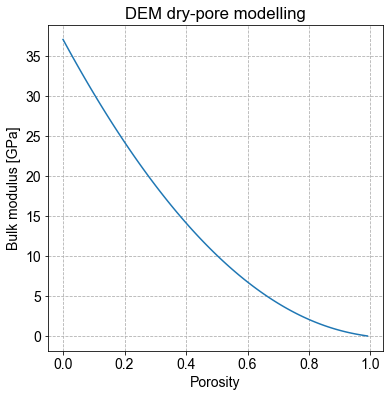

In [10]:
# plot
plt.figure(figsize=(6,6))
plt.xlabel('Porosity')
plt.ylabel('Bulk modulus [GPa]')
plt.title('DEM dry-pore modelling')
plt.plot(t, K_dry_dem)
plt.grid(ls='--')

<div class="alert alert-block alert-info">
<b>Reference:</b> Mavko, G., Mukerji, T. and Dvorkin, J., 2020. The rock physics handbook. Cambridge university press.
</div>